In [119]:
####################################################################
#Trabalho 2
#Gabriel Busquim e Livia Aloise
####################################################################
#COLOCAR CURVA DE APRENDIZADO,CONTAR QUANTOS TEM DE CADA CLASSE ANTES DE JUNTAR

In [120]:
#Leitura do arquivo com a base de dados

import pandas 

arquivo = "car.txt"
df = pandas.DataFrame(pandas.read_csv(arquivo, sep=","))
df.head()


,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [121]:
#Conversão de dados categóricos em dados numéricos

df['buyingPrice'].replace(("low","med","high","vhigh"), (0,1, 2,3), inplace=True)
df['maintPrice'].replace(("low","med","high","vhigh"), (0,1,2,3), inplace=True)
df['numDoors'].replace(("2","3","4","5more"), (0,1,2,3), inplace=True)
df['numPersons'].replace(("2","4","more"), (0,1,2), inplace=True)
df['spaceLuggage'].replace(( "small", "med","big"), (0,1,2), inplace=True)
df['safety'].replace(("low","med","high"), (0,1,2), inplace=True)
df['class'].replace(("unacc", "acc", "good", "vgood"), (0,1,2,3), inplace=True)

df.head()

,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [122]:
df.describe()


,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


C:\Users\gbtat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


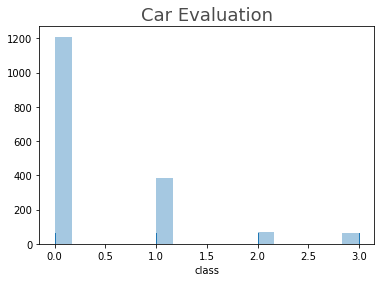

In [123]:
#Executar a celula duas vezes para o gráfico aparecer
import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.distplot(df["class"], kde=False, rug=True);
graph.axes.set_title('Car Evaluation', fontsize=18, alpha=0.7)
plt.savefig('CarEvaluation.png',dpi=300, bbox_inches='tight')



In [124]:
counts = df["class"].value_counts()
print(counts)

0    1210
1     384
2      69
3      65
Name: class, dtype: int64


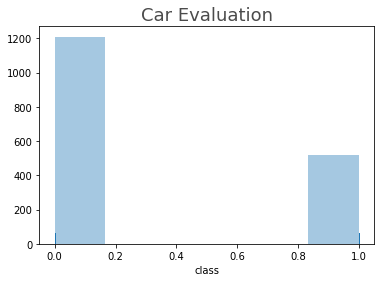

In [125]:
#junção das classes "médio,bom e muito bom" e exibião do gráfico para examinar o novo dataset
import numpy as np

df['class'] = pandas.Series(np.where(df['class'].values >= 1, 1, 0), df.index)
graph = sns.distplot(df["class"], kde=False, rug=True);
graph.axes.set_title('Car Evaluation', fontsize=18, alpha=0.7)
plt.savefig('CarEvaluation.png',dpi=300, bbox_inches='tight')

In [126]:
counts = df["class"].value_counts()
print(counts)

0    1210
1     518
Name: class, dtype: int64


## FALTA DEFINIR SEED

In [127]:
#

#import random



# Definir seed utilizada
seed_num = 800
seed_tt = 700

In [281]:
#Algoritmos de aprendizado de máquina

from sklearn.model_selection import train_test_split
from sklearn import neighbors
import time

#função que recebe os atributos de entrada, o atributo alvo da predição e os dados para gerar um classificador KNN
def executeKNN(outputFeatures,inputFeatures, dataset,numNeighbors,testSize,trainSize,seed):                                                                 
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    #separacao entre conjunto de treino e teste
    inputTrain, inputTest,outputTrain,outputTest, = train_test_split(inputData, outputData, test_size=testSize,train_size=trainSize,random_state=np.random.seed(seed))
    
    knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=numNeighbors, weights="distance")
    #instanciação do timer
    start = time.time()
                                                              
    #Treino do conjunto
    knnClassifier = knnClassifier.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
  
    start = time.time()
    #Classificação para um exemplo desconhecido
    knnClassifier.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = end - start

    # Prever as classificações para o conjunto de teste
    predictionResult = knnClassifier.predict(inputTest)

    return predictionResult,outputTest,trainingTime,examplePredictionTime
 

In [279]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#função que recebe os atributos de entrada, o atributo alvo da predição e os dados para gerar uma arvore de decisao
def executeDecisionTree(outputFeatures, inputFeatures,dataset,testSize,trainSize,seed):
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    #separacao entre conjunto de treino e teste
    inputTrain, inputTest,outputTrain,outputTest, = train_test_split(inputData, outputData, test_size=testSize,train_size=trainSize,random_state=np.random.seed(seed))
    decisionTree = tree.DecisionTreeClassifier(random_state=np.random.seed(700))
    
    #instanciação do timer
    start = time.time()
    #Treino do conjunto
    decisionTree = decisionTree.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
  
    start = time.time()
    #Classificação para um exemplo desconhecido
    decisionTree.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = float(end - start)

    # Prever as classificações para o conjunto de teste
    predictionResult = decisionTree.predict(inputTest)

    return predictionResult,outputTest,trainingTime,examplePredictionTime,decisionTree


In [259]:
#Escolha dos melhores atributos
import collections
from sklearn import metrics
import math
from sklearn.feature_selection import SelectKBest

features = list(df.columns)[:-1]
inx = 0
scoreByFeature = {}
predictionFeature =  "class"

inputFeatures = np.array(df[features])
outputFeatures = np.array(df[predictionFeature])

bestFeatures = SelectKBest(k='all')
fit = bestFeatures.fit(inputFeatures,outputFeatures)
for score in fit.scores_:
    scoreByFeature[score] = features[inx]
    inx += 1    
scoreByFeature = collections.OrderedDict(reversed(sorted(scoreByFeature.items())))

print("Pontuação por atributo:")
for score in scoreByFeature:
    print("Atributo: " + str(scoreByFeature[score]))
    print("Pontuação: " + str(score))
    print ("\n")


print("Acurácia por conjunto de atributos:\n")
for k in range(1,len(features)):
    currentInputFeatures = []
    for score in scoreByFeature:
        if(len(currentInputFeatures) < k):
            currentfeature = scoreByFeature[score]
            currentInputFeatures.append(currentfeature)
        else:
            break
    
    
    print("Conjunto de atributos:"+str(currentInputFeatures))
    
    resultPrediction,correctPrediction,_,_,_ = executeDecisionTree(predictionFeature, currentInputFeatures, 
                                                                                   df,0.3,0.7,1000)
    accuracyDecisionTree = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para a Árvore de Decisão: " + str(accuracyDecisionTree))

    resultPrediction, correctPrediction,_,_ = executeKNN(predictionFeature, currentInputFeatures, 
                                                                           df,5,0.3,0.7,1000)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")

Pontuação por atributo:
Atributo: safety
Pontuação: 469.7976246172706


Atributo: numPersons
Pontuação: 315.1510058376697


Atributo: buyingPrice
Pontuação: 75.32227452798266


Atributo: maintPrice
Pontuação: 59.05802886658906


Atributo: spaceLuggage
Pontuação: 28.22864500059991


Atributo: numDoors
Pontuação: 6.689922480620202


Acurácia por conjunto de atributos:

Conjunto de atributos:['safety']
Acurácia para a Árvore de Decisão: 0.7032755298651252
Acurácia para o KNN: 0.628131021194605


Conjunto de atributos:['safety', 'numPersons']
Acurácia para a Árvore de Decisão: 0.8535645472061657
Acurácia para o KNN: 0.8400770712909441


Conjunto de atributos:['safety', 'numPersons', 'buyingPrice']
Acurácia para a Árvore de Decisão: 0.8959537572254336
Acurácia para o KNN: 0.8670520231213873


Conjunto de atributos:['safety', 'numPersons', 'buyingPrice', 'maintPrice']
Acurácia para a Árvore de Decisão: 0.9190751445086706
Acurácia para o KNN: 0.9190751445086706


Conjunto de atributos:['safet

In [291]:
chosenFeatures =['safety', 'numPersons', 'buyingPrice']
predictionFeature =  "class"

In [261]:
#Escolha do melhor tamanho para o conjunto de treinamento/testes

possibleTrainingSizes = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.8]

for possibleSize in possibleTrainingSizes:
    print("Tamanho: " + str(round(possibleSize*100)) +"% para treino e " + str(round((1-possibleSize)*100)) + "% para teste." )
    resultPrediction,correctPrediction,_,_,_ = executeDecisionTree(predictionFeature, chosenFeatures, 
                                                                                   df,1-possibleSize,possibleSize,1000)
    accuracyDecisionTree = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para a Árvore de Decisão: " + str(accuracyDecisionTree))

    resultPrediction, correctPrediction,_,_ = executeKNN(predictionFeature, chosenFeatures, 
                                                         df,5,1-possibleSize,possibleSize,1000)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")
    

Tamanho: 50% para treino e 50% para teste.
Acurácia para a Árvore de Decisão: 0.8877314814814815
Acurácia para o KNN: 0.8738425925925926


Tamanho: 55% para treino e 45% para teste.
Acurácia para a Árvore de Decisão: 0.890745501285347
Acurácia para o KNN: 0.8701799485861182


Tamanho: 60% para treino e 40% para teste.
Acurácia para a Árvore de Decisão: 0.8930635838150289
Acurácia para o KNN: 0.8034682080924855


Tamanho: 65% para treino e 35% para teste.
Acurácia para a Árvore de Decisão: 0.8925619834710744
Acurácia para o KNN: 0.859504132231405


Tamanho: 70% para treino e 30% para teste.
Acurácia para a Árvore de Decisão: 0.8959537572254336
Acurácia para o KNN: 0.8670520231213873


Tamanho: 75% para treino e 25% para teste.
Acurácia para a Árvore de Decisão: 0.8981481481481481
Acurácia para o KNN: 0.8611111111111112


Tamanho: 80% para treino e 20% para teste.
Acurácia para a Árvore de Decisão: 0.869942196531792
Acurácia para o KNN: 0.8554913294797688


Tamanho: 85% para treino e 15%

In [262]:
bestTrainingSetSize = 0.75
bestTestSetSize = 0.25

In [263]:
#Escolha do melhor número de vizinhos para o método KNN

possibleNeighbourNumbers = [1,3,5,7,9,11,13,15,17]

for possibleNeighbourNumber in possibleNeighbourNumbers:
    print("Número de vizinhos: "+str(possibleNeighbourNumber))
    resultPrediction, correctPrediction,_,_= executeKNN(predictionFeature, chosenFeatures, df,
                                                         possibleNeighbourNumber,bestTestSetSize,bestTrainingSetSize,1000)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")
    
    

Número de vizinhos: 1
Acurácia para o KNN: 0.8449074074074074


Número de vizinhos: 3
Acurácia para o KNN: 0.8263888888888888


Número de vizinhos: 5
Acurácia para o KNN: 0.8611111111111112


Número de vizinhos: 7
Acurácia para o KNN: 0.8449074074074074


Número de vizinhos: 9
Acurácia para o KNN: 0.8611111111111112


Número de vizinhos: 11
Acurácia para o KNN: 0.8611111111111112


Número de vizinhos: 13
Acurácia para o KNN: 0.8796296296296297


Número de vizinhos: 15
Acurácia para o KNN: 0.8796296296296297


Número de vizinhos: 17
Acurácia para o KNN: 0.8796296296296297




In [264]:
bestNumberOfNeighbours = 13

In [265]:
#Métricas de Avaliação: Acurácia, Sensibilidade(recall) e Precisão
from sklearn import metrics

def calculateMetrics(resultPrediction,correctPrediction):
    precision = metrics.precision_score(y_true=correctPrediction, y_pred=resultPrediction)
    recall = metrics.recall_score(y_true=correctPrediction, y_pred=resultPrediction)
    accuracy = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction)
    return accuracy,recall,precision

In [283]:
#Resultados para a árvore de decisão 

resultPrediction, correctPrediction, trainingTime,examplePredictionTime,decisionTree = executeDecisionTree(predictionFeature, chosenFeatures, 
                                                                                   df,bestTestSetSize,bestTrainingSetSize,1000)
accuracy,recall,precision=calculateMetrics(resultPrediction, correctPrediction)

print(accuracy)
print(recall)
print(precision)
print(trainingTime)
print (examplePredictionTime)





0.8425925925925926
1.0
0.6530612244897959
0.0014181137084960938
0.0


In [252]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ["Bad","Not Bad"]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix








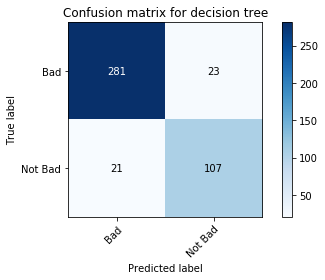

In [253]:
plot_confusion_matrix(correctPrediction, resultPrediction, target_classifications,normalize=False,
                      title='Confusion matrix for decision tree')


plt.show()

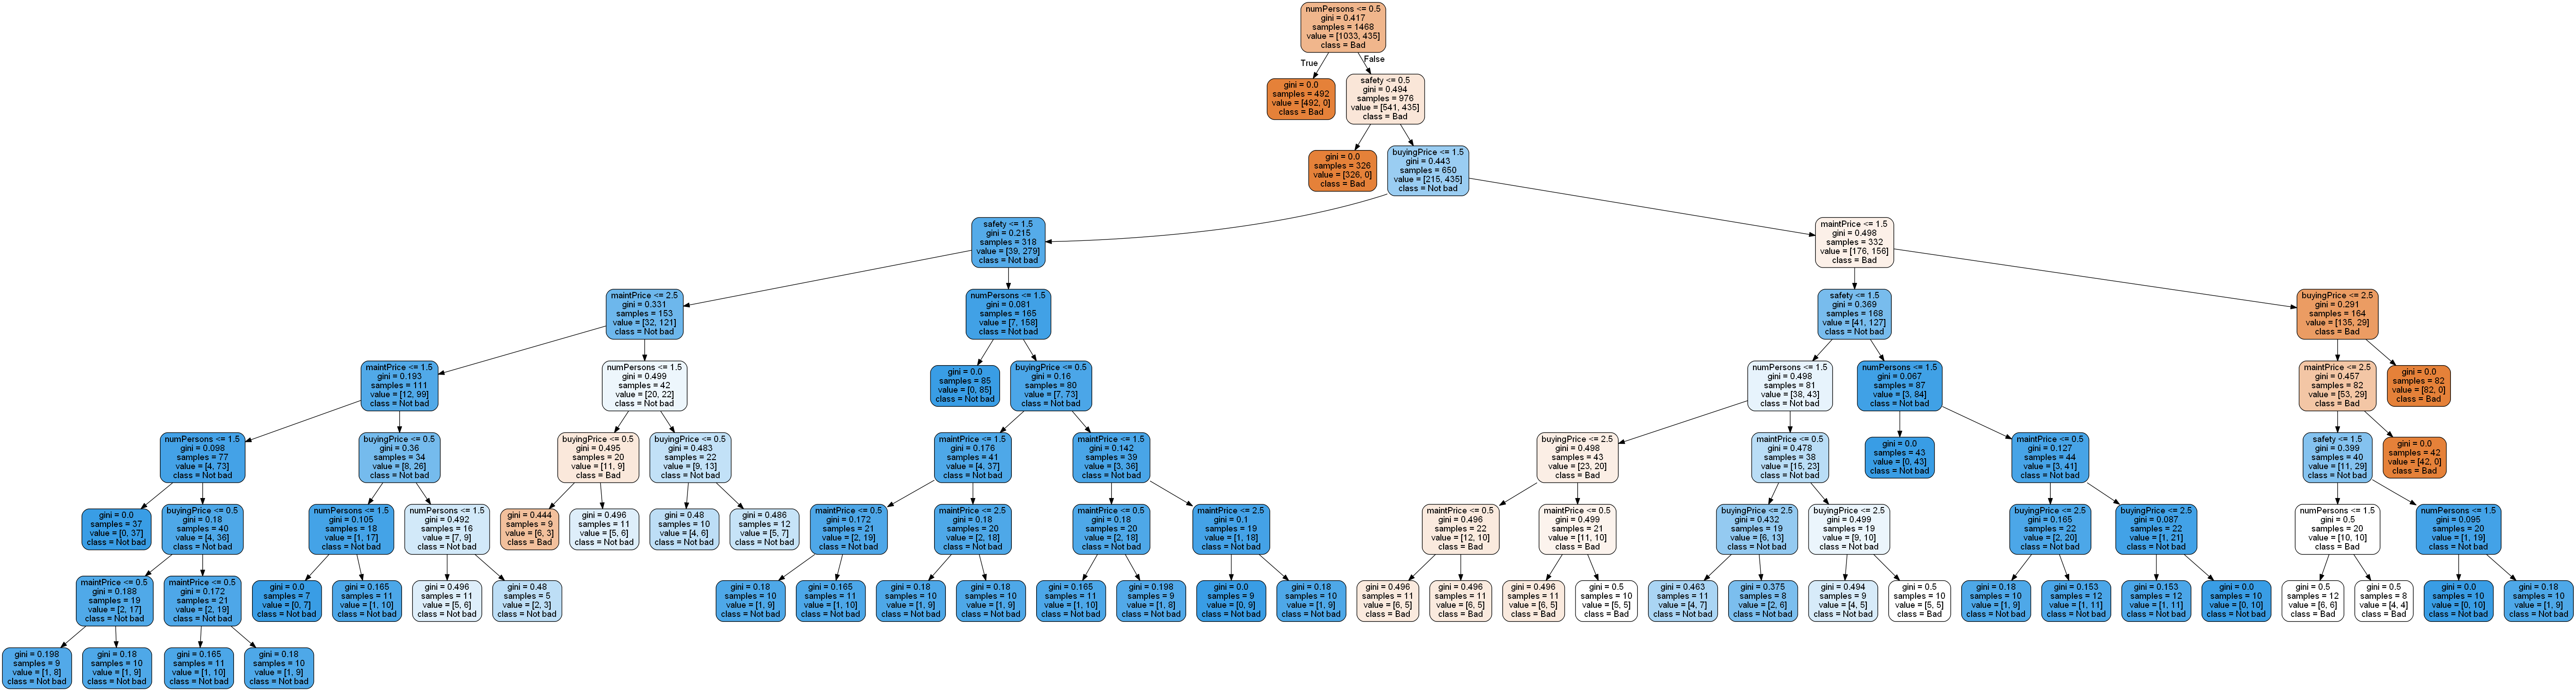

In [210]:
import os
import pydotplus
from IPython.display import Image

os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
target_classifications = range(0,2)

target_labels = []
for classification in target_classifications:
    if(classification == 0):
        target_labels.append('Bad')
    elif(classification == 1):
        target_labels.append('Not bad')

dot_data = tree.export_graphviz(decisionTree,feature_names=chosenFeatures, class_names=target_labels,out_file=None,
                                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('DecisionTreeMap.png')


Image("DecisionTreeMap.png")

In [284]:
#Resultados para o KNN

resultPrediction, correctPrediction, trainingTime,examplePredictionTime = executeKNN(predictionFeature, chosenFeatures, 
                                                                df,bestNumberOfNeighbours,bestTestSetSize,bestTrainingSetSize,1000)
accuracy,recall,precision=calculateMetrics(resultPrediction, correctPrediction)


print(accuracy)
print(recall)
print(precision)
print(trainingTime)
print (examplePredictionTime)



0.8333333333333334
0.7578125
0.7028985507246377
0.0014865398406982422
0.001377105712890625


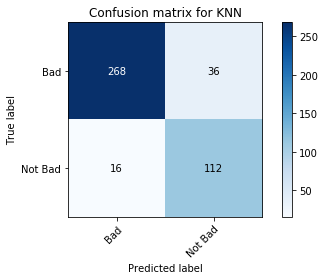

In [250]:
plot_confusion_matrix(correctPrediction, resultPrediction, target_classifications,normalize=False,
                      title='Confusion matrix for KNN')


plt.show()

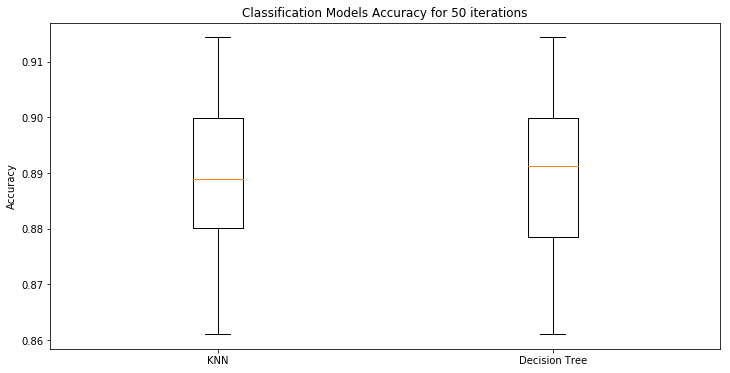

In [297]:
# Comparacao dos metodos

# Voltando ao número normal de features (utilizadas para medir os modelos) 


X = np.array(df[chosenFeatures])
Y = np.array(df[predictionFeature])

acc_r=np.zeros((30, 2))

for i in range(30):    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,train_size=0.75,random_state=np.random.seed(i * 20))
    
    # configure 4 types of models
    knn = neighbors.KNeighborsClassifier(n_neighbors=13, weights="distance")
    dt = tree.DecisionTreeClassifier()
    
    # train each model
    knn.fit(X_train,Y_train)
    dt.fit(X_train,Y_train)
    
    # test each model
    Yhat_knn=knn.predict(X_test)
    Yhat_dt=dt.predict(X_test)
    
    # accuracy of each model at this iteration
    acc_r[i][0] = metrics.accuracy_score(Yhat_knn, Y_test)
    acc_r[i][1] = metrics.accuracy_score(Yhat_dt, Y_test)
    
plt.figure(figsize=(12,6))
plt.boxplot(acc_r)

ax = plt.gca()
ax.set_xticklabels(['KNN', 'Decision Tree'])
plt.ylabel('Accuracy')
plt.title('Classification Models Accuracy for 50 iterations')
plt.savefig('BoxPlot_Accuracy_Comparison.png',dpi=300, bbox_inches='tight')